<a href="https://colab.research.google.com/github/AgentZero2483/Stock_Price_Predictions/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this program I use an artificial recurrent nerual network called Long Short Term Memory (LSTM) to predict the closing Stock price of a selected stock. I do this using the past 60 day stock price.**

In [1]:
#Import Dependencies
#!pip install sklearn
#!pip install keras

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import datetime
import time
import plotly.graph_objects as go
import plotly.express as px


In [46]:
#get the stock quote
#Create input log for our ticker to search. for now we'll use TSLA as a practice stock
ticker = input("Enter your Ticker: ") 
print(ticker)

#Create Variables for query string
current_time = datetime.datetime.now() 
year = current_time.year
month = current_time.month
day = current_time.day
hour = current_time.hour
minute = current_time.minute

Enter your Ticker: sq
sq


In [47]:
start_year = 2010 #int(input("Enter your Start Year: "))
start_month = 7 #int(input("Enter your Start month: "))
start_day = 25 #int(input("Enter your Start day: "))

#datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])
#period1 = int(time.mktime(datetime.datetime(2020, 6, 22, 23, 59).timetuple())) #'1516406400'
period1 = int(time.mktime(datetime.datetime(start_year, start_month, start_day, hour, minute).timetuple())) #'1516406400'
#time.mktime converts our ouptput into second values
period2 = int(time.mktime(datetime.datetime(year, month, day, hour, minute).timetuple())) #'1624147200'
interval = '1d' #'1wk' '1m'

In [48]:
#Create query string to download stock data using variables created above
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

#read in query string to a pandas dataframe
df = pd.read_csv(query_string)
df

#Reindex dataframe by date
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2015-11-19,2015-11-19,11.20,14.78,9.00,13.07,13.07,47466100
2015-11-20,2015-11-20,13.92,14.05,12.50,12.85,12.85,16550300
2015-11-23,2015-11-23,13.00,13.15,12.10,12.12,12.12,5172200
2015-11-24,2015-11-24,12.00,12.23,11.52,12.02,12.02,4714700
2015-11-25,2015-11-25,12.12,12.40,11.85,11.90,11.90,3583400


In [49]:
#Visualize closing price history
#Create interactive Candle stick chart
figure = go.Figure(
    data = [
            go.Candlestick(
                x = df.index,
                low = df['Low'],
                high = df['High'],
                close = df['Close'],
                open = df['Open'],
                increasing_line_color = 'green',
                decreasing_line_color = 'red',
            )
    ]
)

figure.show()

In [55]:
#Visualize closing price history
figure = px.line(
              x = df.index,
              y = df['Close'],
              title = f'{ticker} Price History {start_year}-{start_month}-{start_day} to {year}-{month}-{day}'
)

figure.update_layout(
    yaxis_title = f'{ticker} Stock Price USD ($)',
    xaxis_title = f'Date',
    xaxis_rangeslider_visible = True
)

figure.show()

#go.line(df, x="year", y="lifeExp", title='Life expectancy in Canada'


In [57]:
#Create new data frame with only close column
close_df = df.filter(['Close'])
#Dataframe to numpy array
dataset = close_df.values
#Get number rows to train model
training_data_len = math.ceil(len(dataset) *.7) #math.ceil used to round up
print(training_data_len)
dataset

1000


array([[ 13.07    ],
       [ 12.85    ],
       [ 12.12    ],
       ...,
       [257.25    ],
       [260.589996],
       [264.      ]])

In [59]:
#Scale Data
    #Almost always advantageous to apply Pre-Processing, Transformations, Scaling or Normalization to input data before it is applied to a neuro-network
scaler = MinMaxScaler(feature_range=(0,1))#Create MinMax Scaler value. The values will be 0-1 inclusive so it can include 0 and 1
scaled_data = scaler.fit_transform(dataset)#Create variable to Hold data set thats now scaled. Computes min and max used for scaling and transforms data based off value.

scaled_data

array([[0.01752424],
       [0.01670395],
       [0.0139821 ],
       ...,
       [0.92796418],
       [0.94041756],
       [0.95313197]])

In [60]:
#Create training data set
#Create scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split data into x_train and y_train data sets
x_train = [] #Independent training variables or the training features 
y_train = [] #Dependent variable or the target variable

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0]) #appened the data from the past 60 data points so x_train should contain 60 values from position 0-59
  y_train.append(train_data[i, 0]) #will contain the 61 value at position 60
  if i <=60:
    print(x_train)
    print(y_train)
    print()

[array([0.01752424, 0.01670395, 0.0139821 , 0.01360925, 0.01316182,
       0.0137211 , 0.01368382, 0.0131991 , 0.01327368, 0.01323639,
       0.01368382, 0.01487696, 0.0139821 , 0.01349739, 0.0137211 ,
       0.01334825, 0.0147651 , 0.0152871 , 0.01454139, 0.01472781,
       0.01480239, 0.01442953, 0.01524981, 0.01539896, 0.01577181,
       0.01662938, 0.01629381, 0.01644295, 0.01759881, 0.01413124,
       0.01170768, 0.01174497, 0.01040268, 0.01096197, 0.01293811,
       0.01387025, 0.01208054, 0.00913497, 0.00708427, 0.00410142,
       0.00417599, 0.00615213, 0.00551827, 0.00536913, 0.00436242,
       0.00253542, 0.00137957, 0.00149142, 0.00145414, 0.00037286,
       0.00022371, 0.00197614, 0.00096943, 0.        , 0.00093214,
       0.00190157, 0.00093214, 0.00346756, 0.00581655, 0.00548098])]
[0.006002982691943035]



In [61]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [62]:
#Reshape the data #LSTM Expects the data to be 3D in form of (number samples, number time-steps, number features) but it is currently 2D
x_train.shape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) #(Number Rows, Number timesteps,  )
x_train.shape

(940, 60, 1)

In [63]:
#build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [64]:
#Compile the Model
model.compile(optimizer = 'adam', loss='mean_squared_error') 
#optimizer used to improve apon loss function, loss function used to measure how well model did at training.

In [65]:
#train model
model.fit(x_train, y_train, batch_size=1, epochs=1, )
#fit is another name for train, Training datasets=(x_train, y_train), batch size is the total training examples present in a given batch.  Epoch is our number iterations when an entire data base is passed forward and backward through a nerual network

940/940 [==============================] - 29s 27ms/step - loss: 0.0013


In [66]:
#Create testing dataset
#Create new array containing scaled values from index 1543 to 2003. this will be the scaled data set
test_data = scaled_data[training_data_len - 60:, : ]
#create the data set x_test, and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [67]:
#convert data to a numpy array
x_test = np.array(x_test)

In [68]:
#reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [69]:
#Get models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [70]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

14.25708547595272

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



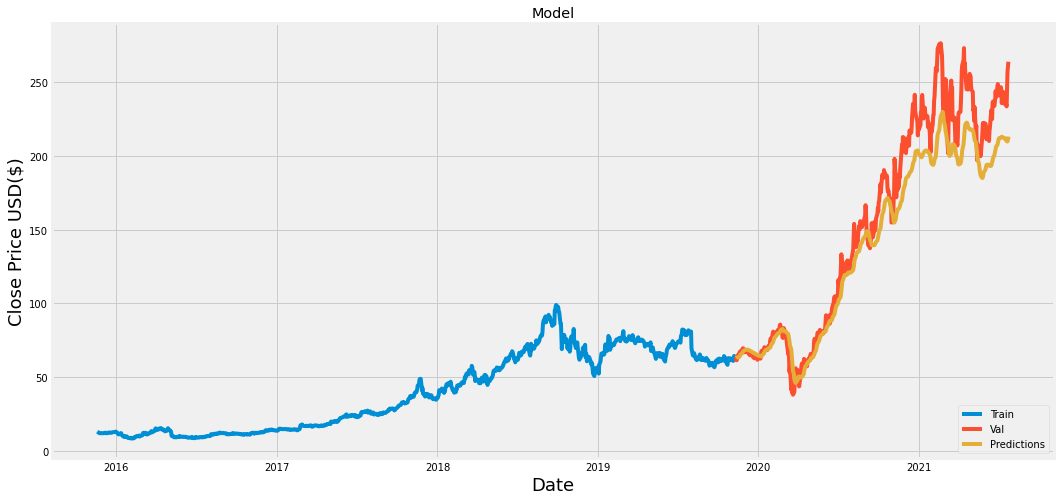

In [71]:
#Plot the data 
train = close_df[:training_data_len]
valid = close_df[training_data_len:]
valid['Predictions'] = predictions
#Visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [72]:
valid

,Close,Predictions
2019-11-11,63.790001,63.089951
2019-11-12,61.540001,63.296074
2019-11-13,61.509998,63.348049
2019-11-14,62.990002,63.305321
2019-11-15,64.699997,63.328407
...,...,...
2021-07-19,233.690002,210.681427
2021-07-20,246.470001,209.918320
2021-07-21,257.250000,210.020508
2021-07-22,260.589996,211.271149
